This example assumes you've read `advanced.ipynb`, and covers:
    - Creating custom callbacks

In [1]:
import os
import sys
from pathlib import Path
os.environ['TF_KERAS'] = '1'
os.environ['SCALEFIG'] = '.8'  # scale all drawn plots by 0.8
sys.path.insert(0, str(Path(Path.cwd()).parents[1]))
sys.path.insert(0, os.path.join(Path(Path.cwd()).parents[2], "see-rnn"))

import deeptrain
deeptrain.append_examples_dir_to_sys_path()
from utils import make_classifier, init_session, img_labels_paths
from utils import CL_CONFIGS as C
from deeptrain.callbacks import TraingenCallback

import matplotlib.pyplot as plt

We can use two types of callbacks: objects (instances of `TraingenCallback`), or functions.

### Callback function
Function callback takes `TrainGenerator` instance as the only argument. Below will print the total number of batches fit so far.

In [2]:
def print_batches_fit(tg):
    print("\nBATCHES FIT: %s\n" % tg._batches_fit)

The next step is to specify *when* the callback is called. Callbacks are
called at several stages throughout training: <br>
  `{'train:iter', 'train:batch', 'train:epoch',
  'val:iter',   'val:batch',  'val:epoch', 'val_end', 'save', 'load'}`.<br>
E.g. `'train:batch'` corresponds to `_on_batch_end` within `_train_postiter_processing` (`TrainGenerator` methods).

In [3]:
pbf = {'train:epoch': print_batches_fit}  # print on every epoch

### Callback object
Callback objects subclass TraingenCallback, which defines methods to override as ways to specify the *when* instead of dict keys. See `deeptrain.callbacks.TraingenCallback`.

In [4]:
class VizWeights(TraingenCallback):
    """Show histogram of first layer's kernel weights at end of each validation."""
    def on_val_end(self, stage=None):
        # method will be called within TrainGenerator._on_val_end
        W = self.tg.model.layers[1].get_weights()[0]
        plt.hist(W.ravel(), bins=200)
        plt.show()

vizw = VizWeights()

### Init & train

In [5]:
C['traingen']['epochs'] = 4
C['traingen']['callbacks'] = [pbf, vizw]
C['datagen']['labels_path']     = img_labels_paths[0]
C['val_datagen']['labels_path'] = img_labels_paths[1]
tg = init_session(C, make_classifier)

Discovered 50 files with matching format
Discovered dataset with matching format
50 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
Discovered dataset with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Preloading superbatch ... Discovered 50 files with matching format
.................................................. finished, w/ 6400 total samples
Train initial data prepared
Preloading superbatch ... Discovered 36 files with matching format
.................................... finished, w/ 4608 total samples
Val initial data prepared
Logging ON; directory (new): C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M44__model-Adam__min999.000



Fitting set 1...   (Loss, Acc) = (2.310532, 0.117188) 
Fitting set 2...   (Loss, Acc) = (2.291493, 0.132812) 
Fitting set 3...   (Loss, Acc) = (2.283365, 0.140625) 
Fitting set 4...   (Loss, Acc) = (2.275483, 0.150391) 
Fitting set 5...   (Loss, Acc) = (2.272290, 0.154688) 
Fitting set 6...   (Loss, Acc) = (2.259211, 0.169271) 
Fitting set 7...   (Loss, Acc) = (2.254731, 0.175223) 
Fitting set 8...   (Loss, Acc) = (2.249311, 0.180664) 
Fitting set 9...   (Loss, Acc) = (2.242474, 0.190104) 
Fitting set 10...  (Loss, Acc) = (2.232331, 0.200000) 
Fitting set 11...  (Loss, Acc) = (2.223186, 0.205966) 
Fitting set 12...  (Loss, Acc) = (2.213924, 0.216797) 
Fitting set 13...  (Loss, Acc) = (2.203779, 0.227163) 
Fitting set 14...  (Loss, Acc) = (2.196311, 0.231027) 
Fitting set 15...  (Loss, Acc) = (2.190150, 0.234375) 
Fitting set 16...  (Loss, Acc) = (2.182841, 0.243164) 
Fitting set 17...  (Loss, Acc) = (2.173503, 0.248162) 
Fitting set 18...  (Loss, Acc) = (2.167328, 0.251736) 
Fitting s

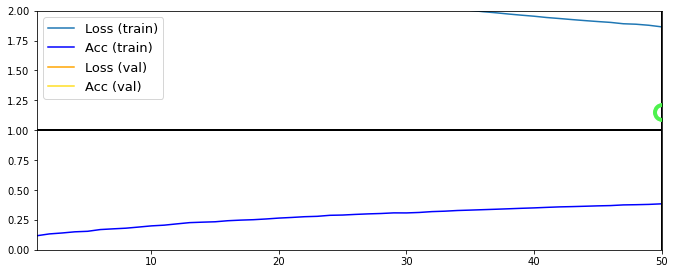


BATCHES FIT: 50



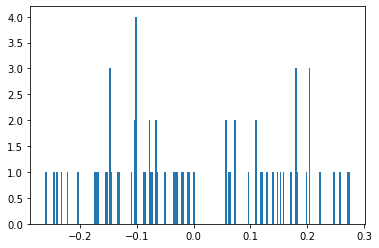


Fitting set 39...  (Loss, Acc) = (1.450307, 0.570312) 
Fitting set 37...  (Loss, Acc) = (1.405900, 0.578125) 
Fitting set 25...  (Loss, Acc) = (1.472935, 0.531250) 
Fitting set 16...  (Loss, Acc) = (1.424751, 0.552734) 
Fitting set 4...   (Loss, Acc) = (1.413594, 0.546875) 
Fitting set 29...  (Loss, Acc) = (1.395616, 0.555990) 
Fitting set 19...  (Loss, Acc) = (1.394601, 0.556920) 
Fitting set 28...  (Loss, Acc) = (1.400090, 0.554688) 
Fitting set 34...  (Loss, Acc) = (1.389584, 0.556424) 
Fitting set 5...   (Loss, Acc) = (1.367166, 0.566406) 
Fitting set 13...  (Loss, Acc) = (1.363344, 0.572443) 
Fitting set 48...  (Loss, Acc) = (1.369732, 0.570312) 
Fitting set 22...  (Loss, Acc) = (1.361917, 0.570312) 
Fitting set 6...   (Loss, Acc) = (1.351807, 0.572545) 
Fitting set 20...  (Loss, Acc) = (1.342753, 0.577604) 
Fitting set 42...  (Loss, Acc) = (1.339306, 0.576172) 
Fitting set 38...  (Loss, Acc) = (1.326109, 0.579044) 
Fitting set 3...   (Loss, Acc) = (1.320624, 0.579861) 
Fitting s

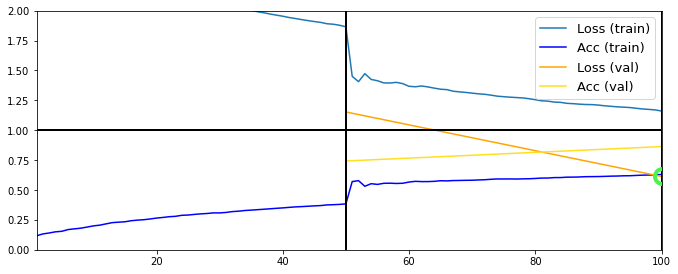


BATCHES FIT: 100



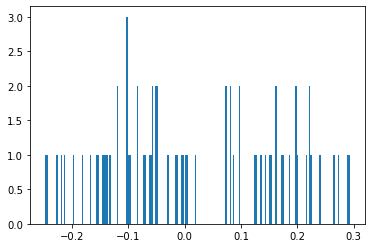


Fitting set 20...  (Loss, Acc) = (0.980337, 0.664062) 
Fitting set 35...  (Loss, Acc) = (0.985783, 0.660156) 
Fitting set 29...  (Loss, Acc) = (0.973371, 0.651042) 
Fitting set 34...  (Loss, Acc) = (0.984672, 0.662109) 
Fitting set 6...   (Loss, Acc) = (0.967824, 0.657813) 
Fitting set 15...  (Loss, Acc) = (0.955124, 0.666667) 
Fitting set 33...  (Loss, Acc) = (0.947794, 0.672991) 
Fitting set 43...  (Loss, Acc) = (0.953311, 0.674805) 
Fitting set 9...   (Loss, Acc) = (0.950665, 0.680556) 
Fitting set 49...  (Loss, Acc) = (0.949468, 0.682031) 
Fitting set 23...  (Loss, Acc) = (0.948289, 0.683239) 
Fitting set 50...  (Loss, Acc) = (0.940952, 0.689453) 
Fitting set 24...  (Loss, Acc) = (0.939689, 0.688101) 
Fitting set 46...  (Loss, Acc) = (0.943652, 0.686384) 
Fitting set 45...  (Loss, Acc) = (0.945838, 0.685417) 
Fitting set 18...  (Loss, Acc) = (0.947042, 0.686035) 
Fitting set 38...  (Loss, Acc) = (0.948111, 0.686121) 
Fitting set 26...  (Loss, Acc) = (0.939201, 0.690104) 
Fitting s

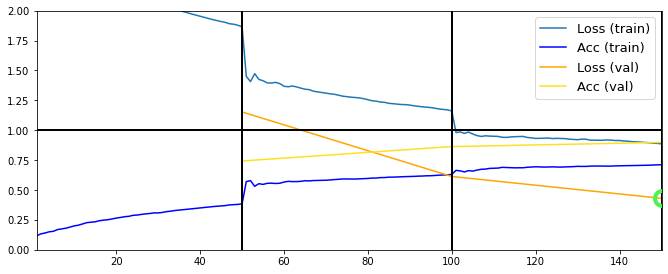


BATCHES FIT: 150



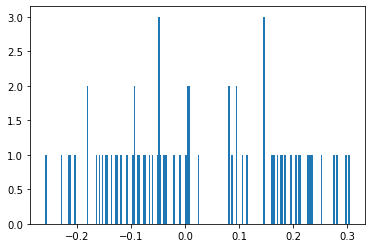


Fitting set 49...  (Loss, Acc) = (0.859067, 0.734375) 
Fitting set 24...  (Loss, Acc) = (0.806792, 0.750000) 
Fitting set 3...   (Loss, Acc) = (0.826682, 0.726562) 
Fitting set 41...  (Loss, Acc) = (0.808721, 0.736328) 
Fitting set 39...  (Loss, Acc) = (0.814668, 0.732812) 
Fitting set 35...  (Loss, Acc) = (0.844096, 0.723958) 
Fitting set 32...  (Loss, Acc) = (0.827992, 0.727679) 
Fitting set 29...  (Loss, Acc) = (0.808339, 0.736328) 
Fitting set 23...  (Loss, Acc) = (0.809380, 0.736979) 
Fitting set 26...  (Loss, Acc) = (0.785870, 0.743750) 
Fitting set 36...  (Loss, Acc) = (0.781552, 0.742188) 
Fitting set 6...   (Loss, Acc) = (0.780604, 0.746094) 
Fitting set 15...  (Loss, Acc) = (0.781645, 0.743389) 
Fitting set 45...  (Loss, Acc) = (0.793999, 0.738281) 
Fitting set 25...  (Loss, Acc) = (0.804186, 0.735417) 
Fitting set 34...  (Loss, Acc) = (0.803680, 0.737305) 
Fitting set 48...  (Loss, Acc) = (0.809371, 0.735294) 
Fitting set 33...  (Loss, Acc) = (0.803908, 0.739149) 
Fitting s

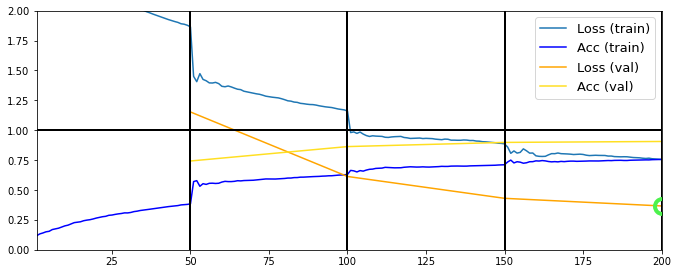


BATCHES FIT: 200



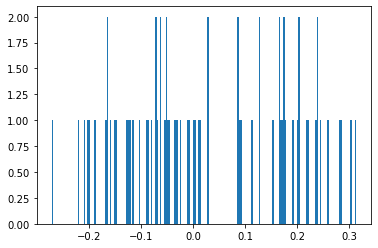

Training has concluded.


In [6]:
tg.train()